<a href="https://colab.research.google.com/github/ElenaIurchenkoMatlas/twitterelection_dataanalysis/blob/main/Topics_adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
# Import the datetime module
from datetime import datetime

In [3]:
file_path = r"/content/drive/MyDrive/DataAnalysisTwitterElection2020/df_combined.csv"
df = pd.read_csv(file_path)

In [4]:
df.shape

(557538, 34)

In [5]:
df.head()

,candidate,created_at,tweet,retweet_count,user_screen_name,user_join_date,user_location,country,continent,state,...,sentiment_score_vader,sentiment_tbl,sentiment_score_tbl,sentiment_agreement,sentiment_bert,sentiment_score,topic_lda,topic_bert,user_age_group,representative_word
0,Joe Biden,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",1.0,snarke,2007-08-26 05:56:11,Portland,USA,North America,Oregon,...,68.1,positive,66.7,True,negative,0.013582,1,-1,<1year,election
1,Joe Biden,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,3.0,Ranaabtar,2009-06-15 19:05:35,Washington DC,USA,North America,District of Columbia,...,50.0,neutral,50.0,True,negative,0.033794,4,34,<1year,people
2,Joe Biden,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,0.0,FarrisFlagg,2013-02-01 01:37:38,"Perris,California",USA,North America,California,...,30.9,negative,44.6,True,negative,0.003601,3,-1,<1year,election
3,Joe Biden,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,sm_gulledge,2017-08-24 16:45:49,"Ohio, USA",USA,North America,Ohio,...,63.7,positive,52.5,True,negative,0.070799,1,-1,<1year,election
4,Joe Biden,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,jamieo33,2012-03-30 00:30:54,"Pennsylvania, USA",USA,North America,Pennsylvania,...,73.8,positive,55.5,True,negative,0.050497,2,-1,<1year,election


In [7]:
#To dt
df['created_at'] = pd.to_datetime(df['created_at'])

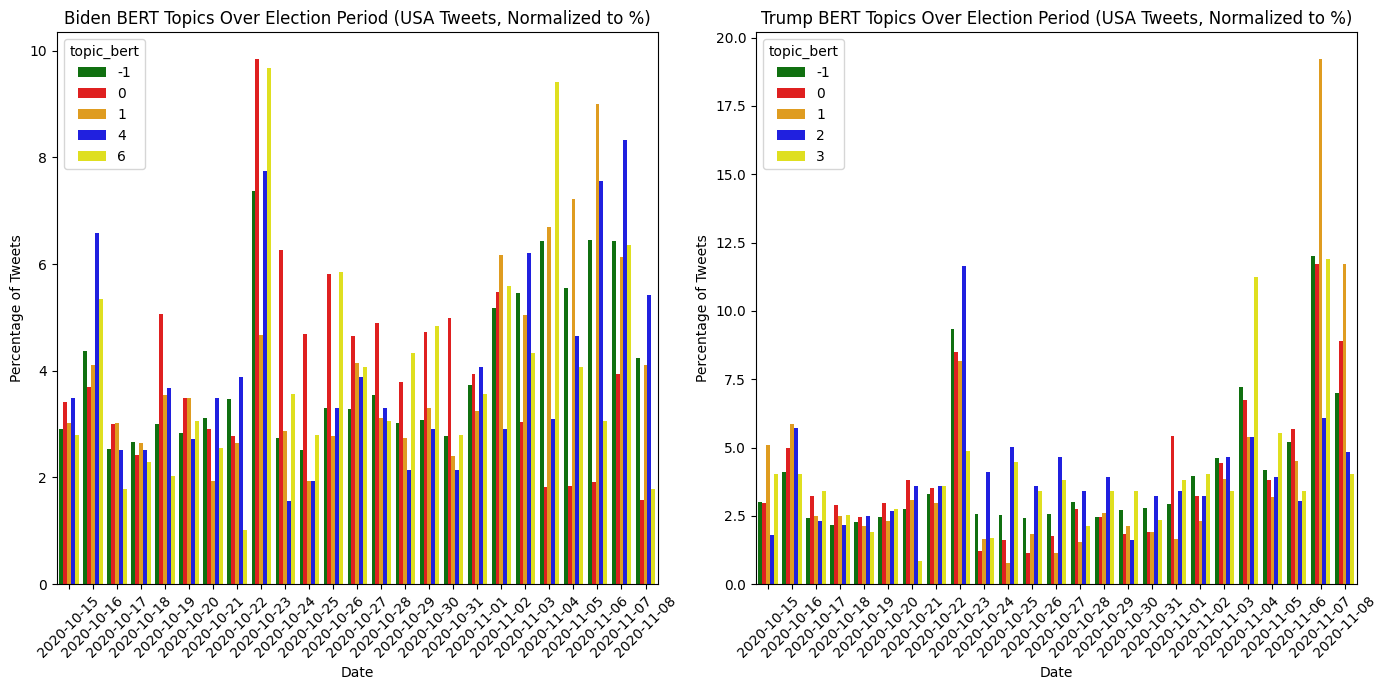

In [8]:
#Mapping of main topics with representation words
# Filter data for Biden and Trump tweets from the USA
usa_data = df[df['country'] == 'USA']
biden_data = usa_data[usa_data['candidate'] == 'Joe Biden']
trump_data = usa_data[usa_data['candidate'] == 'Donald Trump']

# Identify the top 5 topics for both candidates
top_biden_topics = biden_data['topic_bert'].value_counts().nlargest(5).index
top_trump_topics = trump_data['topic_bert'].value_counts().nlargest(5).index

# Filter the data for the top 5 topics
biden_topics = biden_data[biden_data['topic_bert'].isin(top_biden_topics)]
trump_topics = trump_data[trump_data['topic_bert'].isin(top_trump_topics)]

# Prepare data for bar plot and normalize to percentages
biden_topic_counts = biden_topics.groupby(['topic_bert', biden_topics['created_at'].dt.date]).size().unstack(fill_value=0)
trump_topic_counts = trump_topics.groupby(['topic_bert', trump_topics['created_at'].dt.date]).size().unstack(fill_value=0)

# Normalize to percentages
biden_topic_counts_normalized = biden_topic_counts.div(biden_topic_counts.sum(axis=1), axis=0) * 100
trump_topic_counts_normalized = trump_topic_counts.div(trump_topic_counts.sum(axis=1), axis=0) * 100

# Melt the DataFrame for easier plotting with Seaborn
biden_melted = biden_topic_counts_normalized.reset_index().melt(id_vars='topic_bert', var_name='date', value_name='percentage')
trump_melted = trump_topic_counts_normalized.reset_index().melt(id_vars='topic_bert', var_name='date', value_name='percentage')

# Define a color palette
custom_colors = ['green', 'red', 'orange', 'blue', 'yellow']

# Plotting
plt.figure(figsize=(14, 7))

# Bar plot for Biden
plt.subplot(1, 2, 1)
sns.barplot(data=biden_melted, x='date', y='percentage', hue='topic_bert', palette=custom_colors)
plt.title('Biden BERT Topics Over Election Period (USA Tweets, Normalized to %)')
plt.xlabel('Date')
plt.ylabel('Percentage of Tweets')
plt.xticks(rotation=45)

# Bar plot for Trump
plt.subplot(1, 2, 2)
sns.barplot(data=trump_melted, x='date', y='percentage', hue='topic_bert', palette=custom_colors)
plt.title('Trump BERT Topics Over Election Period (USA Tweets, Normalized to %)')
plt.xlabel('Date')
plt.ylabel('Percentage of Tweets')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Biden Dataset main topics over USA are:
-1 -election
0 - covid
1 - politic
4 - people (folk)
6 - discrimination
Trump topics over USA
-1 - election
0 - politic
1 - twitter
2 - election
3 - discrimination

In [11]:
filtered_df = df[
    (df['country'] == 'USA') &
    (df['candidate'].isin(['Joe Biden', 'Donald Trump'])) &
    df['topic_bert'].notna()
]
filtered_df

,candidate,created_at,tweet,retweet_count,user_screen_name,user_join_date,user_location,country,continent,state,...,sentiment_score_vader,sentiment_tbl,sentiment_score_tbl,sentiment_agreement,sentiment_bert,sentiment_score,topic_lda,topic_bert,user_age_group,representative_word
0,Joe Biden,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",1.0,snarke,2007-08-26 05:56:11,Portland,USA,North America,Oregon,...,68.1,positive,66.7,True,negative,0.013582,1,-1,<1year,election
1,Joe Biden,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,3.0,Ranaabtar,2009-06-15 19:05:35,Washington DC,USA,North America,District of Columbia,...,50.0,neutral,50.0,True,negative,0.033794,4,34,<1year,people
2,Joe Biden,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,0.0,FarrisFlagg,2013-02-01 01:37:38,"Perris,California",USA,North America,California,...,30.9,negative,44.6,True,negative,0.003601,3,-1,<1year,election
3,Joe Biden,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,sm_gulledge,2017-08-24 16:45:49,"Ohio, USA",USA,North America,Ohio,...,63.7,positive,52.5,True,negative,0.070799,1,-1,<1year,election
4,Joe Biden,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,jamieo33,2012-03-30 00:30:54,"Pennsylvania, USA",USA,North America,Pennsylvania,...,73.8,positive,55.5,True,negative,0.050497,2,-1,<1year,election
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557526,Donald Trump,2020-11-08 23:56:21,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P,0.0,IAmSeanLassiter,2010-09-16 14:22:20,Philadelphia PA,USA,North America,Pennsylvania,...,55.1,neutral,50.0,False,negative,0.010438,3,-1,<1year,election
557531,Donald Trump,2020-11-08 23:58:10,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,0.0,CapeCodBluesArt,2015-01-13 03:26:55,"Cape Cod, MA",USA,North America,Massachusetts,...,68.1,positive,52.5,True,negative,0.002597,2,-1,<1year,election
557532,Donald Trump,2020-11-08 23:58:24,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,cbillinson,2009-07-10 03:26:49,"Washington, DC",USA,North America,District of Columbia,...,8.2,neutral,50.0,False,negative,0.002147,1,-1,<1year,election
557534,Donald Trump,2020-11-08 23:58:48,The man needs some help...#usa #biden\nWhen wi...,0.0,DrJoeMcCarthy,2020-04-09 00:34:23,Earth. 3rd Planet from Sun.,USA,North America,Idaho,...,50.0,neutral,50.0,True,negative,0.004374,4,-1,6_month-1year,election


In [12]:
trump_condition = (df['candidate'] == 'Donald Trump') & (df['topic_bert'].isin([-1, 0, 1, 2, 3]))
biden_condition = (df['candidate'] == 'Joe Biden') & (df['topic_bert'].isin([-1, 0, 1, 4, 6]))

# Combine conditions
filtered_df = df[(trump_condition) | (biden_condition)]

# Select the required columns
output_df = filtered_df[['topic_bert', 'representative_word', 'candidate']]

print(output_df)

        topic_bert representative_word     candidate
0               -1            election     Joe Biden
2               -1            election     Joe Biden
3               -1            election     Joe Biden
4               -1            election     Joe Biden
5               -1            election     Joe Biden
...            ...                 ...           ...
557532          -1            election  Donald Trump
557533          -1            election  Donald Trump
557534          -1            election  Donald Trump
557535          -1            election  Donald Trump
557536          -1            election  Donald Trump

[374944 rows x 3 columns]


In [14]:
#high representation of topic -1 for both candidates in USA in %
output_df['topic_bert'].value_counts()*100/output_df['topic_bert'].value_counts().sum()

,count
topic_bert,
-1,96.186364
0,1.742127
1,1.272457
2,0.227234
4,0.215232
3,0.208031
6,0.148556


In [15]:
biden_mapping = {-1 : 'election', 0: 'covid', 1: 'politic', 4: 'us folk', 6: 'discrimination'}
trump_mapping = {-1: 'election', 0: 'politic', 1: 'twitter', 2: 'election_trump', 3: 'discrimination'}

# Update representative_word selectively for Joe Biden
for topic, word in biden_mapping.items():
    df.loc[(df['candidate'] == 'Joe Biden') & (df['topic_bert'] == topic), 'representative_word'] = word

# Update representative_word selectively for Donald Trump
for topic, word in trump_mapping.items():
    df.loc[(df['candidate'] == 'Donald Trump') & (df['topic_bert'] == topic), 'representative_word'] = word

# Display the updated DataFrame
print(df)

           candidate          created_at  \
0          Joe Biden 2020-10-15 00:00:02   
1          Joe Biden 2020-10-15 00:00:08   
2          Joe Biden 2020-10-15 00:00:17   
3          Joe Biden 2020-10-15 00:00:18   
4          Joe Biden 2020-10-15 00:00:20   
...              ...                 ...   
557533  Donald Trump 2020-11-08 23:58:27   
557534  Donald Trump 2020-11-08 23:58:48   
557535  Donald Trump 2020-11-08 23:58:56   
557536  Donald Trump 2020-11-08 23:59:16   
557537  Donald Trump 2020-11-08 23:59:38   

                                                    tweet  retweet_count  \
0       #Trump: As a student I used to hear for years,...            1.0   
1       You get a tie! And you get a tie! #Trump ‘s ra...            3.0   
2       @CLady62 Her 15 minutes were over long time ag...            0.0   
3       @DeeviousDenise @realDonaldTrump @nypost There...            0.0   
4       One of the single most effective remedies to e...            0.0   
...            

In [22]:
# Define mappings
biden_mapping = {0: 'covid', 1: 'politic', 4: 'us folk', 6: 'discrimination'}
trump_mapping = {-1: 'election', 0: 'politic', 1: 'twitter', 2: 'election', 3: 'discrimination'}

# Combine mappings for representative_word validation
valid_topics = set(biden_mapping.values()).union(trump_mapping.values())

# Filter data
filtered_df = df[
    (df['country'] == 'USA') &  # Filter by country
    (
        (df['candidate'] == 'Joe Biden') & (df['topic_bert'].isin(biden_mapping.keys())) |
        (df['candidate'] == 'Donald Trump') & (df['topic_bert'].isin(trump_mapping.keys()))
    ) &  # Filter by topic_bert
    (df['representative_word'].isin(valid_topics))  # Validate representative_word
]

# Select relevant columns
filtered_df = filtered_df[['candidate', 'state_code', 'topic_bert', 'representative_word', 'sentiment_vader']]

# Display the filtered DataFrame
print(filtered_df)

           candidate state_code  topic_bert representative_word  \
154        Joe Biden         FL           1             politic   
170        Joe Biden         OR           0               covid   
190        Joe Biden         OR           0               covid   
226        Joe Biden         VT           1             politic   
248        Joe Biden         IL           0               covid   
...              ...        ...         ...                 ...   
557526  Donald Trump         PA          -1            election   
557531  Donald Trump         MA          -1            election   
557532  Donald Trump         DC          -1            election   
557534  Donald Trump         ID          -1            election   
557535  Donald Trump         MN          -1            election   

       sentiment_vader  
154           negative  
170           positive  
190           positive  
226           negative  
248           negative  
...                ...  
557526        positi

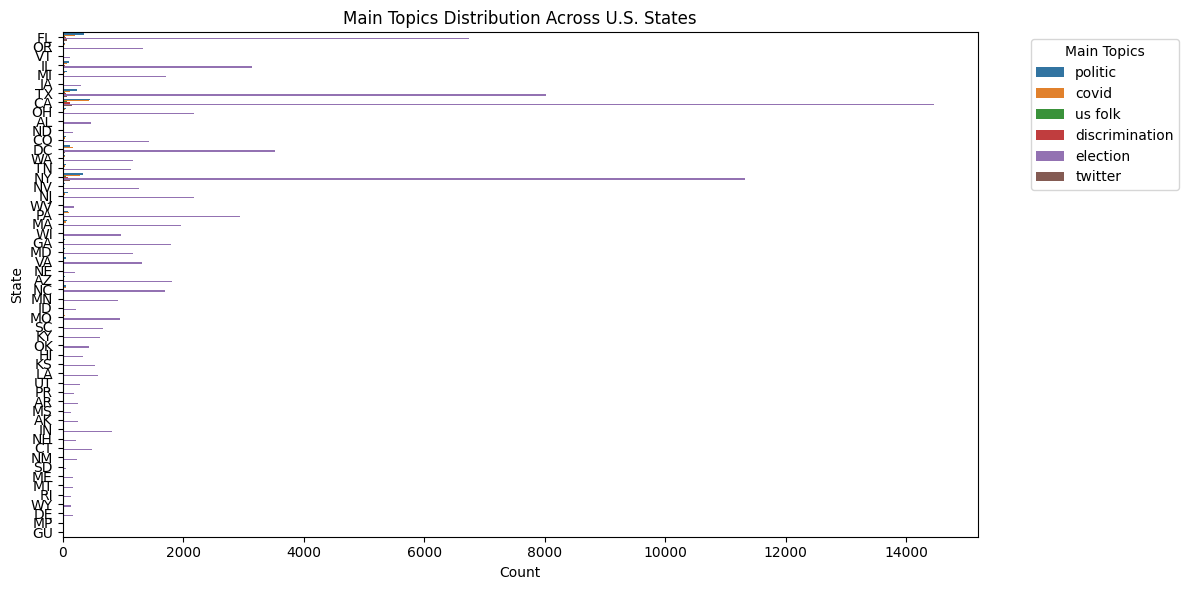

In [23]:
# Plot distribution (with swapped axes)
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_df,
    y='state_code',  # Move 'state_code' to y-axis
    hue='representative_word',  # Group by 'representative_word'
    palette='tab10'
)
plt.title('Main Topics Distribution Across U.S. States')
plt.ylabel('State')  # Label for the y-axis
plt.xlabel('Count')  # Label for the x-axis
plt.legend(title='Main Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

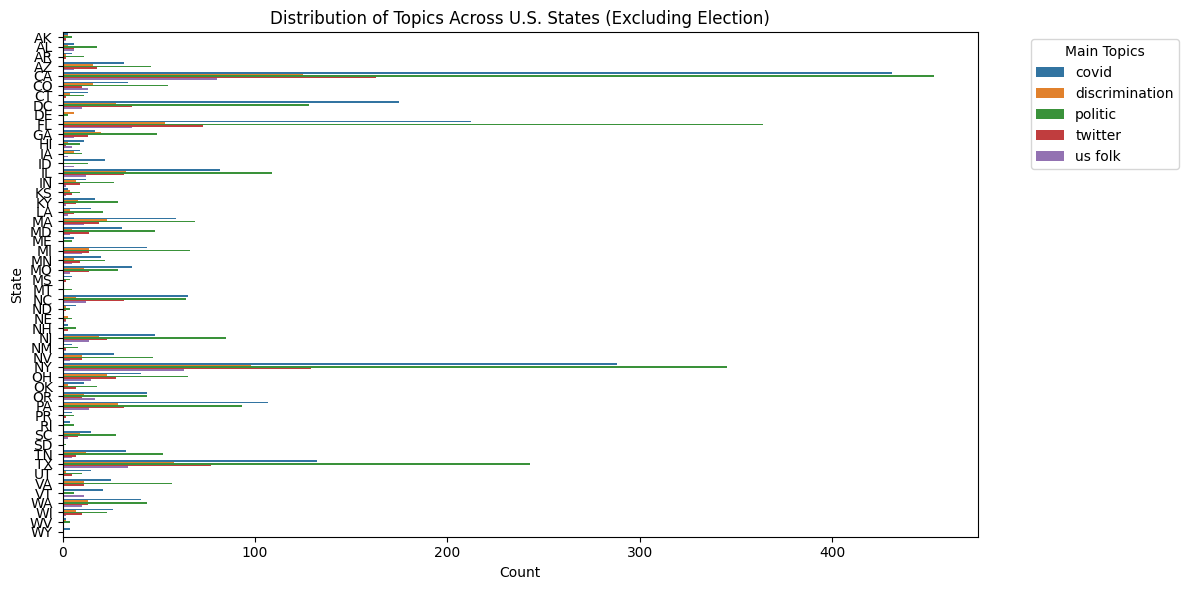

In [25]:
# Filter out rows where 'representative_word' is 'election'
non_election_df = filtered_df[filtered_df['representative_word'] != 'election']

# Calculate the count of each topic per state and representative_word (excluding 'election')
topic_counts_non_election = non_election_df.groupby(['state_code', 'representative_word']).size().reset_index(name='count')

# Plot distribution of all topics except 'election'
plt.figure(figsize=(12, 6))
sns.barplot(
    data=topic_counts_non_election,
    y='state_code',  # 'state_code' on the y-axis
    x='count',  # Use raw counts on the x-axis
    hue='representative_word',  # Group by 'representative_word'
    palette='tab10'
)
plt.title('Distribution of Topics Across U.S. States (Excluding Election)')
plt.ylabel('State')  # Label for the y-axis
plt.xlabel('Count')  # Label for the x-axis
plt.legend(title='Main Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
filtered_df.sample(7)

,candidate,state_code,topic_bert,representative_word,sentiment_vader
435628,Donald Trump,FL,-1,election,negative
388161,Donald Trump,NaN,-1,election,positive
335984,Donald Trump,MA,-1,election,negative
354963,Donald Trump,NaN,-1,election,neutral
382522,Donald Trump,TX,-1,election,negative
313511,Donald Trump,FL,-1,election,positive
346487,Donald Trump,GA,-1,election,positive


In [32]:
filtered_df.to_csv('/content/drive/My Drive/DataAnalysisTwitterElection2020/main_topics_df.csv', index=False)